This is the Assignment of **De Montfort University**.

---

Here are the details:

Student Name: **Karan Falgun Modi**.

PNumber: P2761604

---

This file Containes  the second part of the assignment which is Develop Solutions to machine learning problems (Using  Apache Spark MlLib)

---

Here are the Steps:
1. Data Preprocessing (Step 1 to 4)
  > Step 1 : Imported Required Library and Loaded the dataset in Dataframe.
  
  > Step 2 : Checked for Missing Values in Each Columns
  
  > Step 3 : Removed all the Missing Values for Categorical and Numerical Columns
  
  > Step 4 : Encoded data into binary data (Gender, Education, Self_Employed) & (Property_Area).

2. Apply Classification Algorithms (Step 5 to 10)
  > Step 5 : Imported spark Libraries and started the spark session

  > Step 6 : Spark Df conversion, Splitting, Assemblers And Evaluator

  > Step 7 : Decision Tree Training and Evaluation

  > Step 8 : Confusion Matrix for Decision Tree
  
  > Step 9 : Logistic Regression Training and Evaluation

  > Step 10 : Confusion Matrix for Ligistic Regression

3. Model Comparison (Step 11 & ...)

  > Step 11 :  Model Comparison Table

  > Step 12 : Comparison and Explanation of Models
  


# THE END of PART B.

# Task 1: Data Preprocessing

In [1]:
# Step 1 : Imported Required Library and Loaded the dataset in Dataframe.

import pandas as pd

# Load the train dataset to inspect its structure and contents
train_data = pd.read_csv('/content/train_loan.csv')


train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
# Step 2 : Checked for Missing Values in Each Columns

missing_values = train_data.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values


,0
Gender,13
Married,3
Dependents,15
Self_Employed,32
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50


In [3]:
# Step 3 : Removed all the Missing Values for Categorical and Numerical Columns

# Fill missing values in categorical columns with mode
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed']:
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)

# Fill missing values in numerical columns
for col in ['Loan_Amount_Term', 'Credit_History', 'LoanAmount']:
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)


# To Make SUre that All the columns are not having a null values.
train_data.isnull().sum()

<ipython-input-3-420f35030b2c>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[col].fillna(train_data[col].mode()[0], inplace=True)
<ipython-input-3-420f35030b2c>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [4]:
# Step 4 : Encoded data into binary data (Gender, Education, Self_Employed) & (Property_Area).

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

binary_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

for col in binary_columns:
    train_data[col] = label_encoder.fit_transform(train_data[col])

train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


# Task 2 : Apply Classification Algorithms

In [5]:
# Step 5 : Imported spark Libraries and started the spark session

from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier, LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize Spark session
spark = SparkSession.builder.appName("Loan_Predictions_P2761604").getOrCreate()

In [6]:
# Step 6 : Spark Df conversion, Splitting, Assemblers And Evaluator

# Converted the Pandas dataframe to Spark dataframe
df = spark.createDataFrame(train_data)

feature_cols = list([col for col in train_data.columns if col not in ['Loan_ID', 'Loan_Status']])

assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
assembled_data = assembler.transform(df).select("features", "Loan_Status").withColumnRenamed("Loan_Status", "label")

# Splitted the data into training (70%) and test (30%)
train_data, test_data = assembled_data.randomSplit([0.7, 0.3], seed=42)
train_data.show(10)

# Initialize the evaluator
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")

+--------------------+-----+
|            features|label|
+--------------------+-----+
|(11,[0,1,2,5,7,8]...|    0|
|(11,[0,1,5,7,8,9]...|    0|
|(11,[0,1,5,7,8,9]...|    1|
|(11,[0,1,5,7,8,9]...|    0|
|(11,[0,1,5,7,8,10...|    0|
|(11,[0,3,5,7,8],[...|    0|
|(11,[0,4,5,7,8,9]...|    1|
|(11,[0,4,5,7,8,10...|    0|
|(11,[0,5,6,7,8,9]...|    0|
|(11,[0,5,6,7,8,9]...|    1|
+--------------------+-----+
only showing top 10 rows



In [7]:
# Step 7 : Decision Tree Training and Evaluation
# ------------------------------------
dt = DecisionTreeClassifier(labelCol="label", featuresCol="features")
dt_model = dt.fit(train_data)
dt_predictions = dt_model.transform(test_data)

# Calculate metrics
dt_accuracy = evaluator.evaluate(dt_predictions, {evaluator.metricName: "accuracy"})
dt_precision = evaluator.evaluate(dt_predictions, {evaluator.metricName: "weightedPrecision"})
dt_recall = evaluator.evaluate(dt_predictions, {evaluator.metricName: "weightedRecall"})
dt_f1 = evaluator.evaluate(dt_predictions, {evaluator.metricName: "f1"})

print(f"Decision Tree :\nAccuracy: {dt_accuracy},\nPrecision: {dt_precision},\nRecall: {dt_recall},\nF1: {dt_f1}")
# ------------------------------------

Decision Tree :
Accuracy: 0.7692307692307693,
Precision: 0.7603150661974192,
Recall: 0.7692307692307692,
F1: 0.7527661238335781


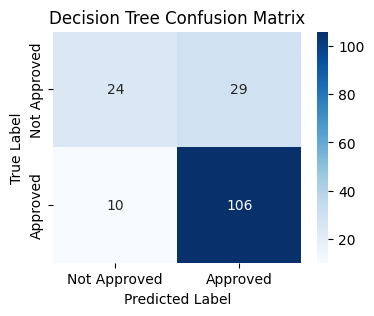

In [8]:
# Step 8 : Confusion Matrix for Decision Tree

# Convert predictions to Pandas DataFrame for confusion matrix
dt_predictions_pd = dt_predictions.select("label", "prediction").toPandas()
dt_conf_matrix = confusion_matrix(dt_predictions_pd["label"], dt_predictions_pd["prediction"])

# Plot confusion matrix heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(dt_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Approved", "Approved"], yticklabels=["Not Approved", "Approved"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Decision Tree Confusion Matrix")
plt.show()

In [9]:
# Step 9 : Logistic Regression Training and Evaluation
# ------------------------------------
lr = LogisticRegression(labelCol="label", featuresCol="features")
lr_model = lr.fit(train_data)
lr_predictions = lr_model.transform(test_data)

# Calculate metrics
lr_accuracy = evaluator.evaluate(lr_predictions, {evaluator.metricName: "accuracy"})
lr_precision = evaluator.evaluate(lr_predictions, {evaluator.metricName: "weightedPrecision"})
lr_recall = evaluator.evaluate(lr_predictions, {evaluator.metricName: "weightedRecall"})
lr_f1 = evaluator.evaluate(lr_predictions, {evaluator.metricName: "f1"})

print(f"Logistic Regression : \nAccuracy: {lr_accuracy}, \nPrecision: {lr_precision}, \nRecall: {lr_recall}, \nF1: {lr_f1}")
# ------------------------------------

Logistic Regression : 
Accuracy: 0.8106508875739645, 
Precision: 0.831913214990138, 
Recall: 0.8106508875739645, 
F1: 0.7868608708845395


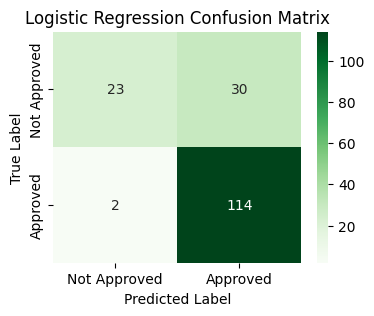

In [10]:
# Step 10 : Confusion Matrix for Ligistic Regression

lr_predictions_pd = lr_predictions.select("label", "prediction").toPandas()
lr_conf_matrix = confusion_matrix(lr_predictions_pd["label"], lr_predictions_pd["prediction"])

# Plot confusion matrix heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(lr_conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=["Not Approved", "Approved"], yticklabels=["Not Approved", "Approved"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Logistic Regression Confusion Matrix")
plt.show()



# Task 3 : Model Comparison

In [11]:
# Step 11 :  Model Comparison Table
# ------------------------------------
comparison_table = pd.DataFrame({
    "Model": ["Decision Tree", "Logistic Regression"],
    "Accuracy": [dt_accuracy, lr_accuracy],
    "Precision": [dt_precision, lr_precision],
    "Recall": [dt_recall, lr_recall],
    "F1 Score": [dt_f1, lr_f1]
})
print(comparison_table)

                 Model  Accuracy  Precision    Recall  F1 Score
0        Decision Tree  0.769231   0.760315  0.769231  0.752766
1  Logistic Regression  0.810651   0.831913  0.810651  0.786861


Here are the visualizations of both models and their Confusion matrix using heatmaps.

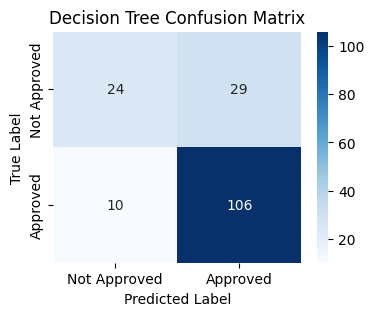


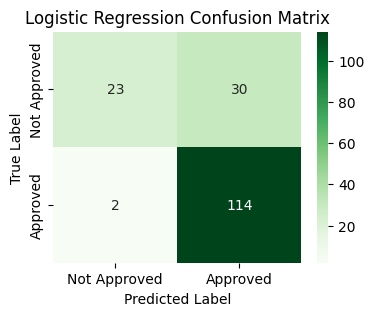

## Step 12 : Comparison and Explanation of Models



---


**Comparison of Metrics:**

Accuracy: Provides a clue on the over accuracy of each architecture.

Precision: Indicates the extent to which each of the models is capable of pinpointing true positives given a set of predicted positives useful in reducing on false positives.

Recall: Explains how each model accurately identifies positive cases necessary in minimizing false negatives.

F1 Score: Combines accuracy of the model with the ability to correctly classify instances of a particular class, which is suitable when quantity of an instance in one class significantly differs from quantity of the same instance in other class.



---


**Confusion Matrix Analysis:**

As we can visualize from the Decision Tree confusion matrix, we can analyze the distribution of misclassified data in contrast with the Logistic Regression matrix.

Looking at the mentioned matrices, it is possible to decide which of the models has fewer false positives or false negatives and where exactly it is complicated for both models.
